In [1]:
from RDMM.CreateDataSets import *
import matplotlib.pyplot as plt
from RDMM.VisualizeDatasets import visualize_fits
from RDMM.QualityFunctions import *
from RDMM.utils import *

In [2]:
df1,df2,_,_,_=generate_two_regression_dataframes([200,300],1,1)
#visualize_fits(*doFitsForDataFrame(df1))
#plt.figure()
#visualize_fits(*doFitsForDataFrame(df2))

In [3]:
np.polyfit(df1["x"],df1['y'],1)

array([-0.10775387,  0.78905545])

(-50.0, 50.0)

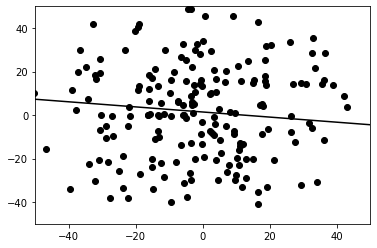

In [4]:
df1_0 = df1[df1['class']==0]
df1_1 = df1[df1['class']==1]
plt.scatter(df1_0["x"],df1_0['y'],label='background',color='k')
beta=np.polyfit(df1_0["x"],df1_0['y'],1)
x=np.linspace(-50,50)
y=np.polyval(beta,x)
plt.plot(x,y,color='k')
plt.xlim([-50,50])
plt.ylim([-50,50])
#plt.savefig('E:/Masterarbeit/background.png',dpi=300)

(-50.0, 50.0)

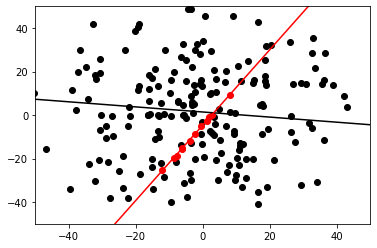

In [5]:
plt.scatter(df1_0["x"],df1_0['y'],label='background',color='k')
plt.scatter(df1_1["x"],df1_1['y'],label='background',color='r')
beta=np.polyfit(df1_0["x"],df1_0['y'],1)
x=np.linspace(-50,50)
y=np.polyval(beta,x)
plt.plot(x,y,color='k')

beta=np.polyfit(df1_1["x"],df1_1['y'],1)
x=np.linspace(-50,50)
y=np.polyval(beta,x)
plt.plot(x,y,color='r')
plt.xlim([-50,50])
plt.ylim([-50,50])
#plt.savefig('E:/Masterarbeit/background-model.png',dpi=300)

(-50.0, 50.0)

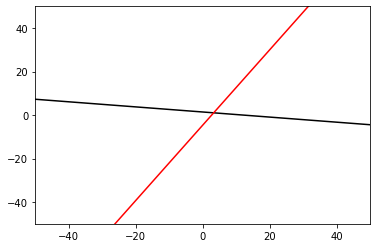

In [6]:
#plt.scatterd(0,df1_0['y'],label='background',color='k')
#plt.scatter(df1_1["x"],df1_1['y'],label='background',color='r')
beta=np.polyfit(df1_0["x"],df1_0['y'],1)
x=np.linspace(-50,50)
y=np.polyval(beta,x)
plt.plot(x,y,color='k')

beta=np.polyfit(df1_1["x"],df1_1['y'],1)
x=np.linspace(-50,50)
y=np.polyval(beta,x)
plt.plot(x,y,color='r')
plt.xlim([-50,50])
plt.ylim([-50,50])
#plt.savefig('E:/Masterarbeit/parameters.png',dpi=300)

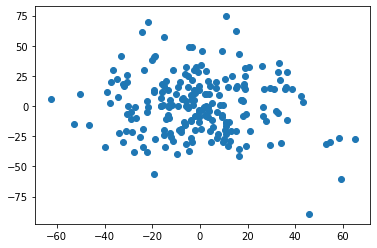

In [7]:
plt.scatter(df1["x"],df1['y'])

In [8]:
df1.columns

Index(['class', 'x', 'y', 'Noise_0'], dtype='object')

In [9]:
np.count_nonzero(df1['Noise_0'])

96

In [10]:
df1.columns

Index(['class', 'x', 'y', 'Noise_0'], dtype='object')

In [11]:
df1_hide=hide(df1,2,100)
d={0:'red',1:'green',2:'blue'}#,3:'blue'}
df1_hide['attr1']=(df1_hide['class_1_0'].astype(int)+(1-df1_hide['class_1_0'])*2*df1_hide['Noise_0'].astype(int)).apply(d.get)


In [12]:
df1['x']-df1_hide['x']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
207    0.0
208    0.0
209    0.0
210    0.0
211    0.0
Name: x, Length: 212, dtype: float64

In [13]:
df1_1['x']

200     2.678674
201    -6.250406
202     8.129958
203    -7.829574
204     1.788806
205    -8.715930
206     1.160765
207    -0.368556
208    -6.193017
209    -3.820685
210    -2.263951
211   -12.305491
Name: x, dtype: float64

In [14]:
beta=np.polyfit(df1_hide['x'].to_numpy().copy(),df1_hide['y'].to_numpy().copy(),1)
beta

array([-0.10775387,  0.78905545])

In [19]:
df2_hide=hide(df2,2,100)

In [23]:
df2_hide

,class,x,y,Noise_0,class_1_0,class_1_1
0,0,3.824987,16.536511,True,True,False
1,0,-7.005239,38.539274,True,False,True
2,0,-2.421767,26.157403,True,False,True
3,0,-25.493678,-27.479944,True,False,False
4,0,12.184106,14.720200,True,False,True
...,...,...,...,...,...,...
316,1,-4.117827,-12.615428,True,True,True
317,1,-3.139258,-10.290586,True,True,True
318,1,6.837383,7.206064,True,True,True
319,1,6.748396,6.551165,True,True,True


False green
False blue
False red
True green
True blue
True red
True False
True True
False False
False True


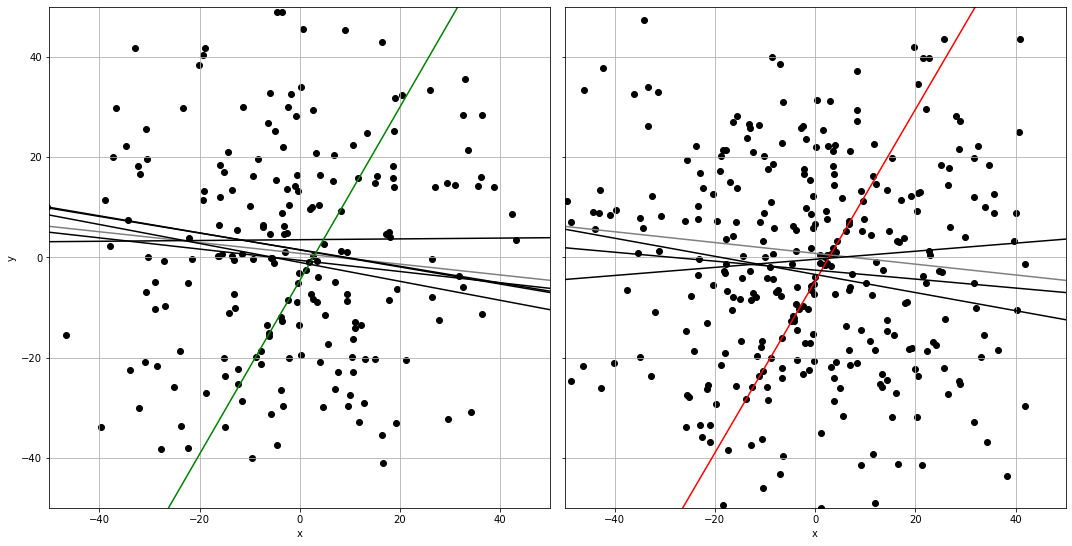

In [31]:

fig, axs = plt.subplots(1, 2,figsize=(15, 15), sharey=True)
fig.set_tight_layout(True)

ax0 = axs[0]
ax1 = axs[1]


def plot_df(df, ax):
    ax.scatter(df['x'],df['y'], color="k")
    x=np.linspace(-50,50)
    y=np.polyval(beta,x)
    ax.plot(x,y, color="gray")
    ax.grid()
    ax.axis("square")
    ax.set_xlim([-50,50])
    ax.set_ylim([-50,50])
    ax.set_xlabel("x")


plot_df(df1_hide, ax0)
ax0.set_ylabel("y")
plot_df(df2_hide, ax1)
col1="class_1_1"
col2="attr1"


from itertools import product
def plot_all(df, col1, col2, color_map, ax=None):
    if ax is None:
        ax = plt.gca()
    all_a = (df[col1]).unique()
    
    all_b = (df[col2]).unique()
    for a,b in product(all_a, all_b):
        print(a,b)
        inds = np.logical_and(df[col1]==a, df[col2]==b)
        df_tmp = df[inds]
        beta=np.polyfit(df_tmp['x'].to_numpy().copy(),df_tmp['y'].to_numpy().copy(),1)
        x=np.linspace(-50,50)
        y=np.polyval(beta,x)
        color = color_map.get((a,b), "k")
        ax.plot(x,y, color=color)
        
        
plot_all(df1_hide, "class_1_1", "attr1", {(True, "green"):"g"}, ax = ax0)
plot_all(df2_hide, "class_1_0", "class_1_1", {(True, True):"r"}, ax = ax1)

In [30]:
fig.savefig("L:/experiments/xx.png", dpi=300)

In [17]:
from itertools import product
name1='attr1'
name2='class_1_1'
df=df1_hide
def plot_df_hide(df,name1,name2,plot_type,path, normal = True):
    df['attr2']=df[name2]
    if not normal:
        df['attr2']=np.logical_not(df[name2])
    
    name2='attr2'
    df[name2+'inv']=np.logical_not(df[name2]).astype(int)
    #sns.set()
    fig = plt.figure()
    l=[]
    for val in df[name1]:
        if not val in l:
            l.append(val)
        if len(l)==3:
            break
    current_palette = sns.color_palette(l)
    #ax = fig.add_subplot(1, 1, 1)
    if not normal:
            g=sns.relplot(x='x',y='y',hue=name1,style=name2,data=df.copy(),palette=current_palette, 
                  legend=False, markers=['s','^'])
    else:
        g=sns.relplot(x='x',y='y',hue=name1,style=name2,data=df.copy(),palette=current_palette, 
                  legend=False)
    #print(df['x'].to_numpy(), df['y'].to_numpy())
    #print(df)
    assert df is df1_hide
    np.polyfit(df1_hide['x'].to_numpy().copy(),df1_hide['y'].to_numpy().copy(),1)
    beta=np.polyfit(df['x'].to_numpy().copy(),df['y'].to_numpy().copy(),1)
    x=np.linspace(-50,50)
    y=np.polyval(beta,x)
    if (1 & plot_type):
        plt.plot(x,y,color='black',linewidth=2)
    
    display_types = []
    if (2 & plot_type):
        display_types.append((True,'--'))
    if (4 & plot_type):
        display_types.append((False,'-'))
    for prop1, (prop2,style) in product(list(d.values()),display_types):
        sel=np.logical_and(df[name1]==prop1, df[name2]==prop2)
        df_tmp=df[sel]
        if len(df_tmp)>0:
            beta=np.polyfit(df_tmp['x'],df_tmp['y'],1)
            x=np.linspace(-50,50)
            y=np.polyval(beta,x)
            plt.plot(x,y,color=prop1,linestyle=style)
    if (8 & plot_type):
        for prop1 in list(d.values()):
            sel=df[name1]==prop1
            df_tmp=df[sel]
            if len(df_tmp)>0:
                beta=np.polyfit(df_tmp['x'],df_tmp['y'],1)
                x=np.linspace(-50,50)
                y=np.polyval(beta,x)
                plt.plot(x,y,color=prop1,linestyle=':')
    if (16 & plot_type):
        for prop2,style in [(True,'--'),(False,'-')]:
            sel=df[name2]==prop2
            df_tmp=df[sel]
            if len(df_tmp)>0:
                beta=np.polyfit(df_tmp['x'],df_tmp['y'],1)
                x=np.linspace(-50,50)
                y=np.polyval(beta,x)
                plt.plot(x,y,color='grey',linestyle=style)
    
    plt.xlim([-50,50])
    plt.ylim([-50,50])
    #plt.savefig(path,dpi=300)
    #g.add_legend()
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #g._legend.set_background_alpha=1
    #g.legend_out=False
    #leg = g._legend
    #leg.background_color='white'
    #leg.alpha=1
    #leg.set_bbox_to_anchor([0.7,0.7])

d={0:'red',1:'green',2:'blue'}
#plot_df_hide(df1_hide,name1,name2,'E:/Masterarbeit/L.pdf')
for val in [31]:#[0,1,3,5,9,17,31]:
    plot_df_hide(df1_hide,name1,name2,val,'E:/Masterarbeit/L'+str(val)+'.png',True)

NameError: name 'sns' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
def plot_df_hide(df,name1,name2,plot_type,path, normal = True):

In [ ]:
df2_hide=hide(df2,2,100)
d={0:'orange',1:'purple',2:'purple'}#,3:'blue'}
df2_hide['attr1']=(df2_hide['class_1_0'].astype(int)).apply(d.get)#+(1-df2_hide['class_1_0'])*2*df2_hide['Noise_0'].astype(int)).apply(d.get)
#plot_df_hide(df2_hide,name1,name2,'E:/Masterarbeit/R.pdf')
for val in [0,1,3,5,9,17,31]:
    plot_df_hide(df2_hide,name1,name2,val,'E:/Masterarbeit/R'+str(val)+'.png',False)

In [ ]:
df

In [ ]:
2&4

In [ ]:
bool(3)